In [47]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from linear_interpolation import clean_data #線性插值法為吉晟學長寫的，路徑需有linear_interpolation.py才能使用

In [48]:
path = os.getcwd()
station = '臺西' #空品監測站：麥寮、臺西、崙背，河川揚塵測站：旭光、義賢

In [49]:
path

'C:\\Users\\Faith\\逢甲\\原始 資料跟前處裡'

In [86]:
raw_data = pd.read_csv(path+'\\空品站整理_20220310_第三批\\'+station+'.csv')
raw_data=raw_data.rename(columns = {"time":"Time"}) 
raw_data['Time']=pd.to_datetime(raw_data['Time'])
raw_data=raw_data[(raw_data['Time']>='2020-01-01 00:00:00')&(raw_data['Time']<='2020-12-31 23:00:00')] #取2020年

raw_data['Time']=raw_data['Time'].astype('str')
raw_data=raw_data.reset_index(drop=True)
raw_data_col = raw_data.columns[1:6] # pm10、wind_speed、wind_direc、amb_temp、rh(這5個特徵都需要補值)
raw_data_timeframe = pd.DataFrame(raw_data.loc[:,'Time']) # 補齊缺失時間

In [87]:
def missing_data(data,col,miss_time,start_time,end_time): #使用該函式需輸入5個參數：raw_data、raw_data_col、raw_data_time、想要補齊的時間區間起始值、想要補齊的時間區間終止值+1天
    plt.plot(data[col][:1000]) # show補值前的data
    plt.title(col,fontproperties="SimSun",fontsize=24)
    plt.show()
    plt.close()
    time = pd.date_range(start=start_time,end=end_time,freq='H')[:-1] # 產生完整時間
    time = pd.DataFrame(time,columns=['Time'])
    time['Time'] = time['Time'].astype(str)
    for i in range(len(miss_time)): # 時間符號處理
        if len(miss_time.loc[i,'Time'])==14:
            miss_time.loc[i,'Time'] = miss_time.loc[i,'Time'][:4]+'-0'+miss_time.loc[i,'Time'][5]+'-0'+miss_time.loc[i,'Time'][7]+' '+miss_time.loc[i,'Time'][9:14]+':00'
        elif (len(miss_time.loc[i,'Time'])==15) & (miss_time.loc[i,'Time'][6]!='/'):
            miss_time.loc[i,'Time'] = miss_time.loc[i,'Time'][:4]+'-'+miss_time.loc[i,'Time'][5:7]+'-0'+miss_time.loc[i,'Time'][8]+' '+miss_time.loc[i,'Time'][10:15]+':00'
        elif (len(miss_time.loc[i,'Time'])==15) & (miss_time.loc[i,'Time'][6]=='/'):
            miss_time.loc[i,'Time'] = miss_time.loc[i,'Time'][:4]+'-0'+miss_time.loc[i,'Time'][5]+'-'+miss_time.loc[i,'Time'][7:9]+' '+miss_time.loc[i,'Time'][10:15]+':00'
        else:
            miss_time.loc[i,'Time'] = miss_time.loc[i,'Time'][:4]+'-'+miss_time.loc[i,'Time'][5:7]+'-'+miss_time.loc[i,'Time'][8:10]+' '+miss_time.loc[i,'Time'][11:16]+':00'
    miss_time[col] = list(data.loc[:,col])
    merge_data = pd.merge(time,miss_time,how='outer')  # 將完整時間的data和缺失時間的data合併，這樣就只剩把PM10補起來就行了
    null = list(merge_data[col].isnull())
    for i in range(len(null)):
        if (null[i] == True) or (merge_data.loc[i,col] < 0):
            merge_data.loc[i,col] = '#' # 將缺值和異常值統一轉成#，比較好處理
    return merge_data

In [88]:
def Complete_data(data,col): # 使用該函式需輸入2個參數：missing_data()的產出、raw_data_col
    fillna_data = data
    cnames = fillna_data.columns[1:]
    fillna_data=fillna_data.set_index(['Time'])
    fillna_data=fillna_data.fillna(value='#') #資料清洗程式碼會將字串進行線性插植
    fillna_data = clean_data.interpolation(fillna_data,cnames) #線性插值法
    fillna_data=fillna_data.astype('float64')
    fillna_data=fillna_data.reset_index()
    plt.plot(fillna_data[col][:1000]) # show補值後的data
    plt.title(col+'(已清洗)',fontproperties="SimSun",fontsize=24)
    plt.show()
    plt.close()
    return fillna_data

# 程式執行區

In [89]:
raw_data

,sitename,amb_temp,ch4,co,nmhc,no,no2,nox,o3,pm10,pm25,rainfall,rh,so2,thc,wd_hr,wind_direc,wind_speed,ws_hr,Time
0,臺西,15.8,1.77,0.22,0.03,2.1,6.4,8.5,33.5,35,10,0.0,85.0,2.4,1.80,22.0,27.0,7.8,7.9,2020-01-01 00:00:00
1,臺西,15.7,1.78,0.24,0.02,1.9,9.1,10.9,30.7,36,13,0.0,85.0,3.4,1.80,23.0,21.0,7.8,7.3,2020-01-01 01:00:00
2,臺西,15.8,1.80,0.25,0.04,1.1,9.3,10.5,28.8,39,15,0.0,85.0,3.5,1.84,24.0,23.0,7.7,7.1,2020-01-01 02:00:00
3,臺西,15.9,1.79,0.24,0.03,1.9,7.2,9.1,31.1,36,16,0.0,86.0,3.0,1.82,24.0,28.0,7.3,7.5,2020-01-01 03:00:00
4,臺西,15.9,1.80,0.24,0.04,2.4,8.2,10.6,29.9,30,16,0.0,85.0,3.4,1.84,29.0,29.0,7.2,7.0,2020-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,臺西,11.3,1.90,0.24,0.06,1.7,13.1,14.8,22.3,43,21,0.0,61.0,2.6,1.96,35.0,34.0,6.8,7.1,2020-12-31 19:00:00
8780,臺西,11.2,1.90,0.25,0.06,1.4,12.7,14.1,22.4,37,24,0.0,61.0,2.6,1.96,35.0,36.0,7.6,7.2,2020-12-31 20:00:00
8781,臺西,11.3,1.91,0.29,0.05,1.6,13.2,14.9,21.3,34,21,0.0,60.0,2.9,1.96,36.0,40.0,6.8,7.0,2020-12-31 21:00:00
8782,臺西,11.3,1.92,0.35,0.06,1.7,14.7,16.4,18.8,37,18,0.0,60.0,3.6,1.98,37.0,38.0,5.4,5.5,2020-12-31 22:00:00


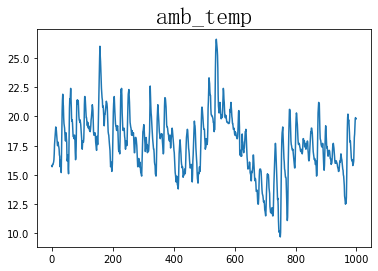

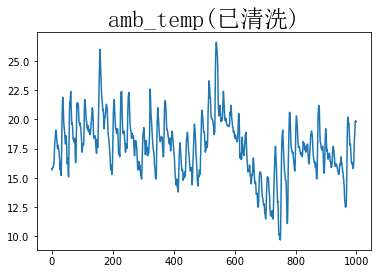

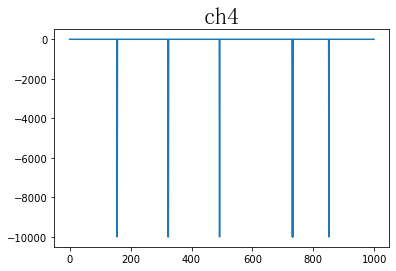

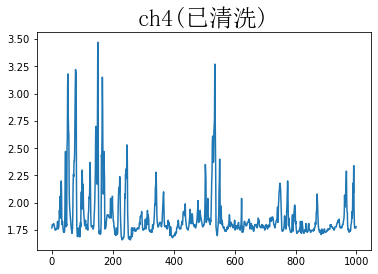

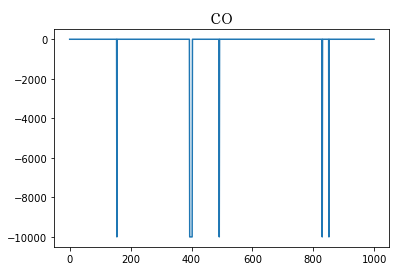

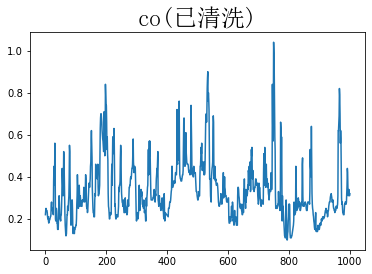

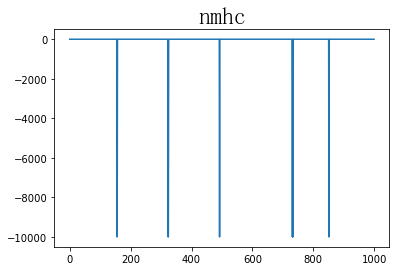

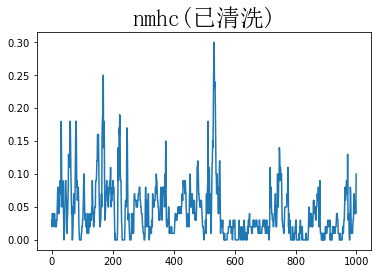

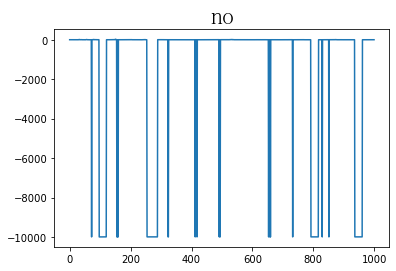

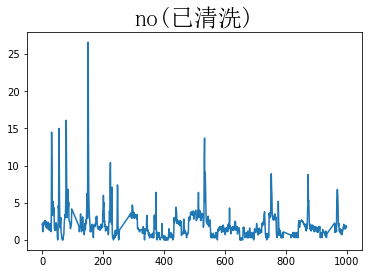

In [90]:
for i in range(len(raw_data_col)): # 補齊所有特徵的缺值
    data = missing_data(raw_data,raw_data_col[i],raw_data_timeframe,'1/1/2020','1/1/2021')
    fillna_data = Complete_data(data,raw_data_col[i])
    if i == 0:
        full_data = fillna_data
    else:
        full_data[raw_data_col[i]] = list(fillna_data[raw_data_col[i]])

In [ ]:
full_data.to_csv(r'D:/'+station+'(已清洗).csv',index = False, header=True,encoding='utf-8-sig') #儲存data

In [92]:
data

,Time,amb_temp,ch4,co,nmhc,no
0,2020-01-01 00:00:00,15.8,1.77,0.22,0.03,2.1
1,2020-01-01 01:00:00,15.7,1.78,0.24,0.02,1.9
2,2020-01-01 02:00:00,15.8,1.80,0.25,0.04,1.1
3,2020-01-01 03:00:00,15.9,1.79,0.24,0.03,1.9
4,2020-01-01 04:00:00,15.9,1.80,0.24,0.04,2.4
...,...,...,...,...,...,...
8779,2020-12-31 19:00:00,11.3,1.90,0.24,0.06,1.7
8780,2020-12-31 20:00:00,11.2,1.90,0.25,0.06,1.4
8781,2020-12-31 21:00:00,11.3,1.91,0.29,0.05,1.6
8782,2020-12-31 22:00:00,11.3,1.92,0.35,0.06,1.7


In [91]:
col=raw_data_col[]
fillna_data = data
cnames = fillna_data.columns[1:]
fillna_data=fillna_data.set_index(['Time'])
fillna_data=fillna_data.fillna(value='#') #資料清洗程式碼會將字串進行線性插植
fillna_data = clean_data.interpolation(fillna_data,cnames) #線性插值法
fillna_data=fillna_data.astype('float64')
fillna_data=fillna_data.reset_index()
plt.plot(fillna_data[col][:1000]) # show補值後的data
plt.title(col+'(已清洗)',fontproperties="SimSun",fontsize=24)
plt.show()
plt.close()

NameError: name 'col' is not defined

In [10]:
raw_data_time

,Time,pm10
0,2020-01-01 00:00:00,39
1,2020-01-01 01:00:00,31
2,2020-01-01 02:00:00,39
3,2020-01-01 03:00:00,41
4,2020-01-01 04:00:00,42
...,...,...
8779,2020-12-31 19:00:00,45
8780,2020-12-31 20:00:00,37
8781,2020-12-31 21:00:00,42
8782,2020-12-31 22:00:00,38


In [13]:
raw_data_time

,Time,pm10
0,2020-01-01 00:00:00,39
1,2020-01-01 01:00:00,31
2,2020-01-01 02:00:00,39
3,2020-01-01 03:00:00,41
4,2020-01-01 04:00:00,42
...,...,...
8779,2020-12-31 19:00:00,45
8780,2020-12-31 20:00:00,37
8781,2020-12-31 21:00:00,42
8782,2020-12-31 22:00:00,38


In [15]:
raw_data_time.loc[0,'Time']

'2020-01-01 00:00:00'

In [21]:
raw_data_time.loc[0,'Time'][6]

'1'

In [20]:
raw_data_time.loc[0,'Time'][6]!='/'

True

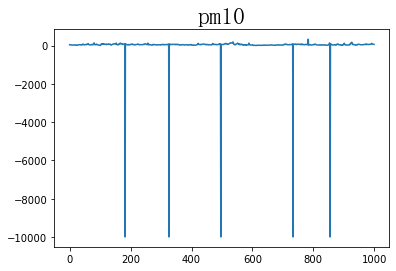

,Time,pm10
0,2020-01-01 00:00:00,39
1,2020-01-01 01:00:00,31
2,2020-01-01 02:00:00,39
3,2020-01-01 03:00:00,41
4,2020-01-01 04:00:00,42
...,...,...
8779,2020-12-31 19:00:00,45
8780,2020-12-31 20:00:00,37
8781,2020-12-31 21:00:00,42
8782,2020-12-31 22:00:00,38


In [9]:
missing_data(raw_data,raw_data_col[0],raw_data_time,'1/1/2020','1/1/2021')